In [3]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [81]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

#read file
#Store data in AnnData format
adata = sc.read_10x_h5(r"C:\Users\victo\Desktop\40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5")
adata.var_names_make_unique()

adata

reading C:\Users\victo\Desktop\40k_NSCLC_DTC_3p_HT_nextgem_Multiplex_count_raw_feature_bc_matrix.h5
 (0:00:06)


AnnData object with n_obs × n_vars = 4387768 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell


C:\Users\victo\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:00)


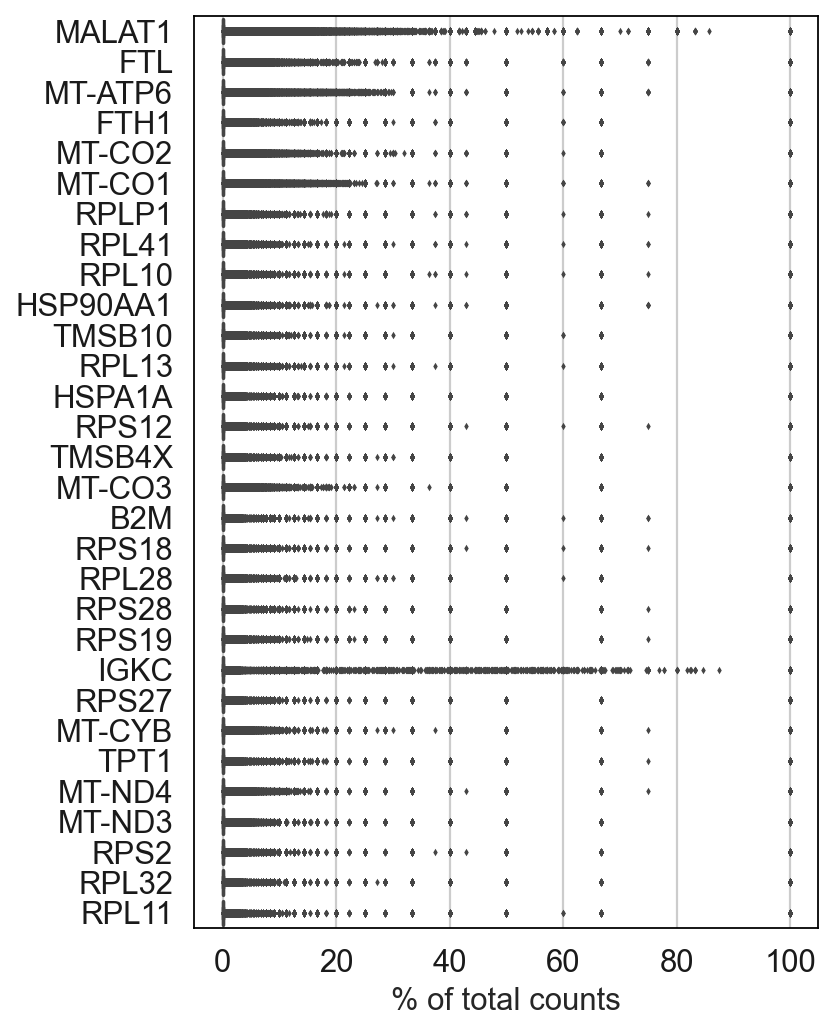

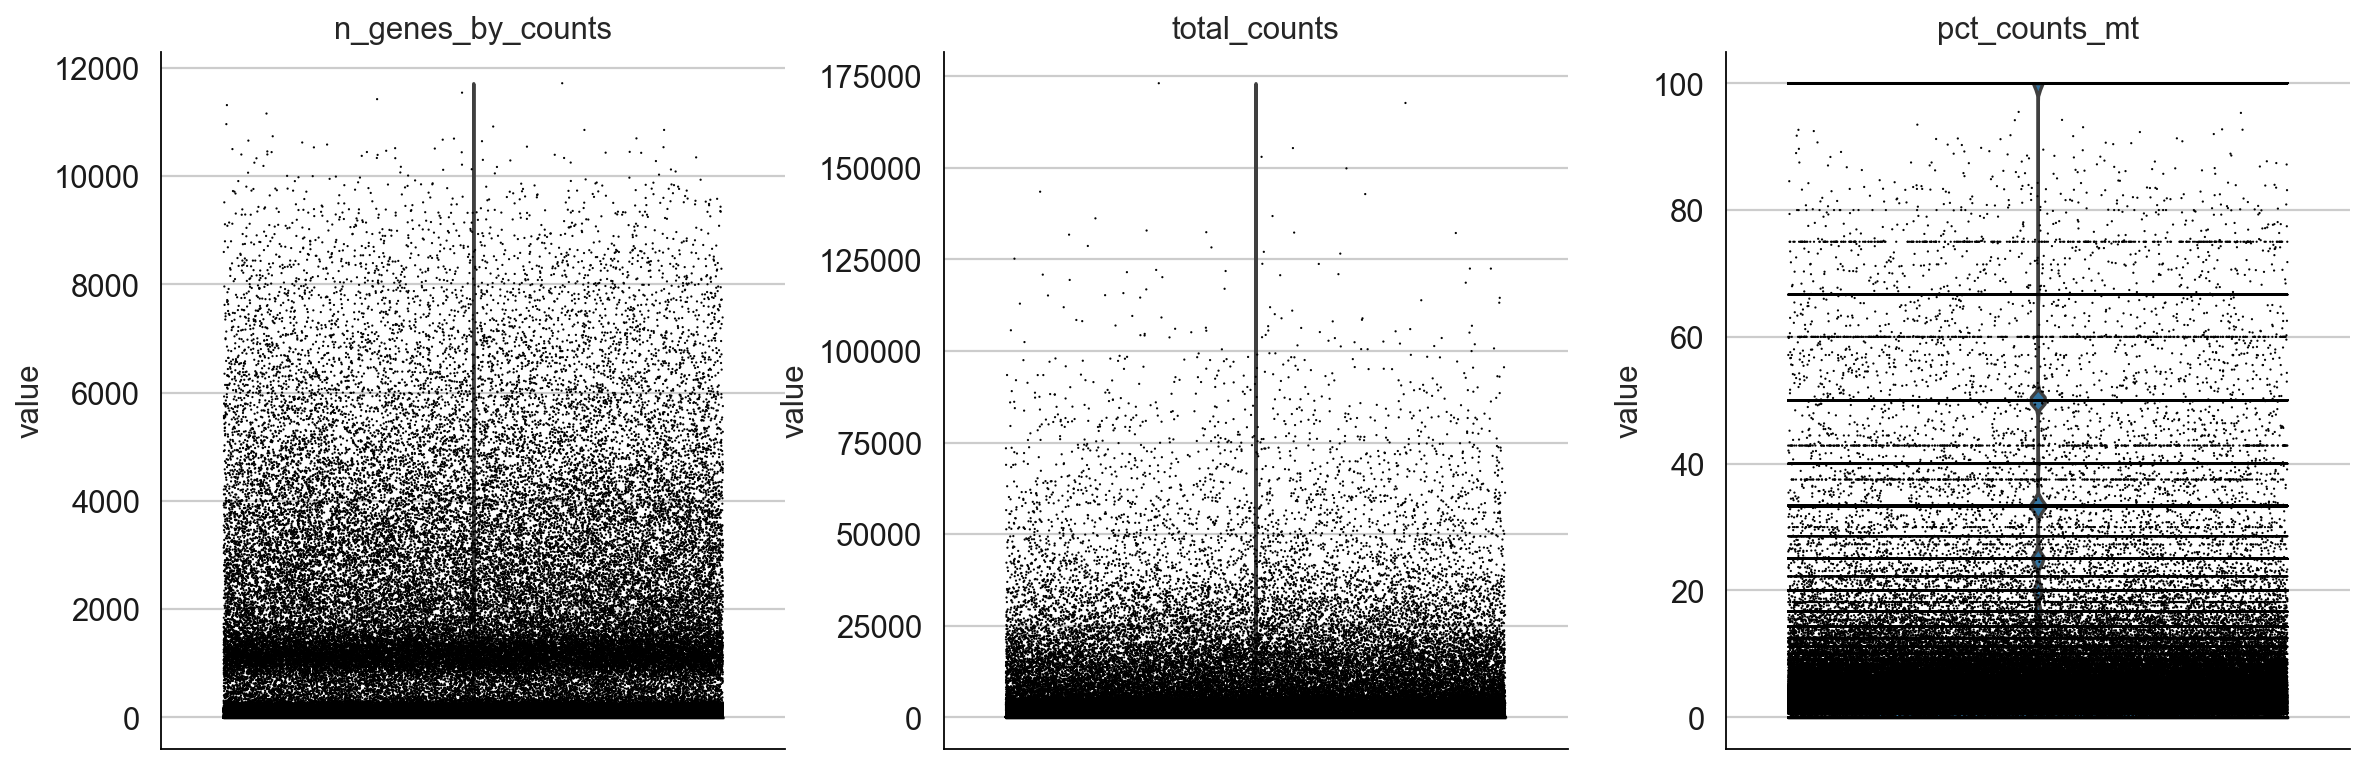

In [82]:
#before filtering
#show genes that yield highest fraction of counts
sc.pl.highest_expr_genes(adata, n_top=30, )

#quality matrix
#The reasoning to use mitochondria protein as quality control is that mitochondria are larger than individual 
#transcript molecules and less likely to escape through tears in the cell membrane.
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

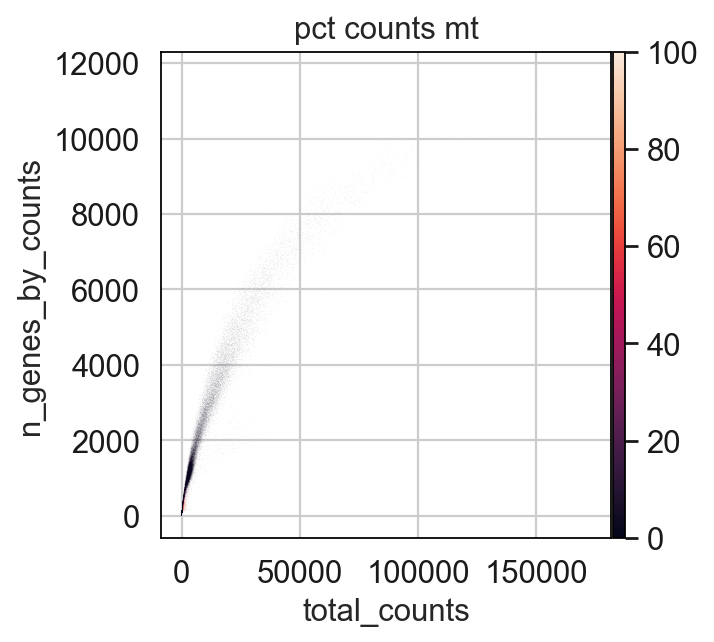

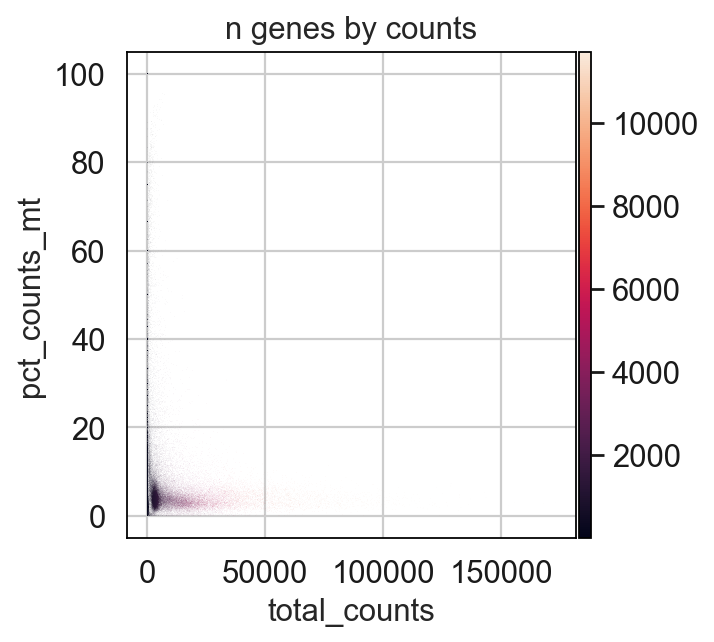

In [83]:
# plot a scatter plot of QC metrics
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color = 'n_genes_by_counts')


In [89]:
#Dataset after data filtering

filtered out 4382221 cells that have less than 5000 genes expressed
filtered out 12895 genes that are detected in less than 20 cells
normalizing counts per cell
    finished (0:00:00)


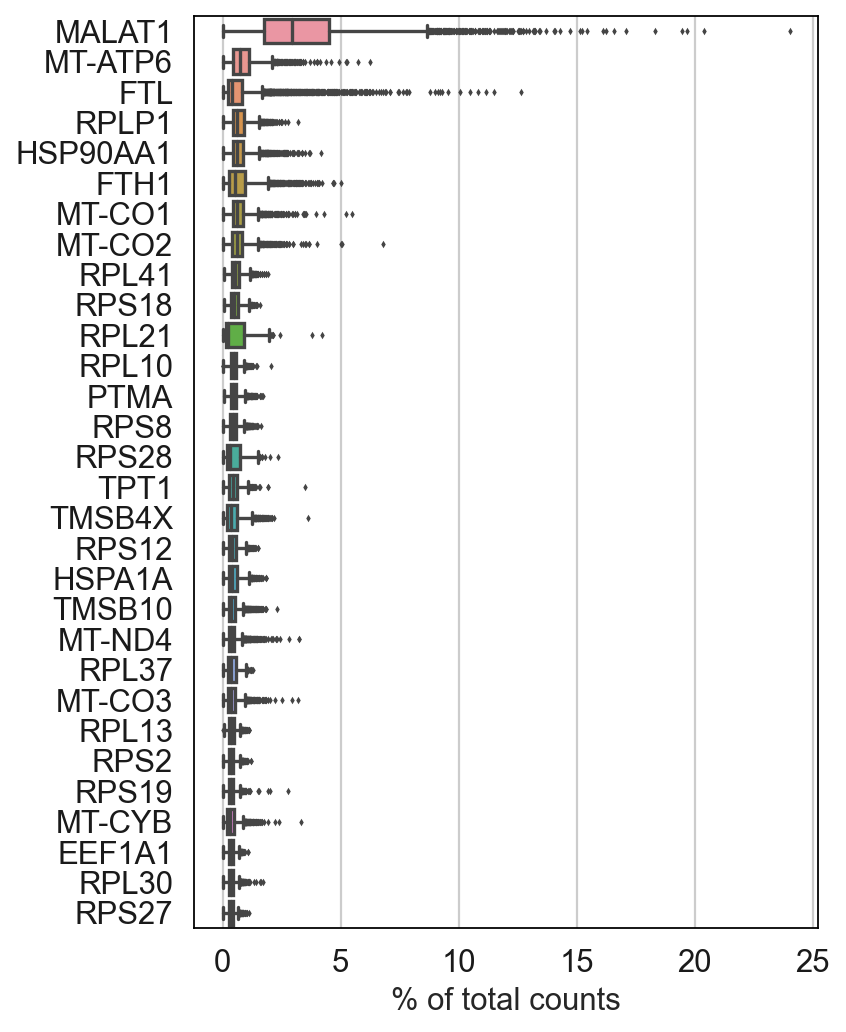

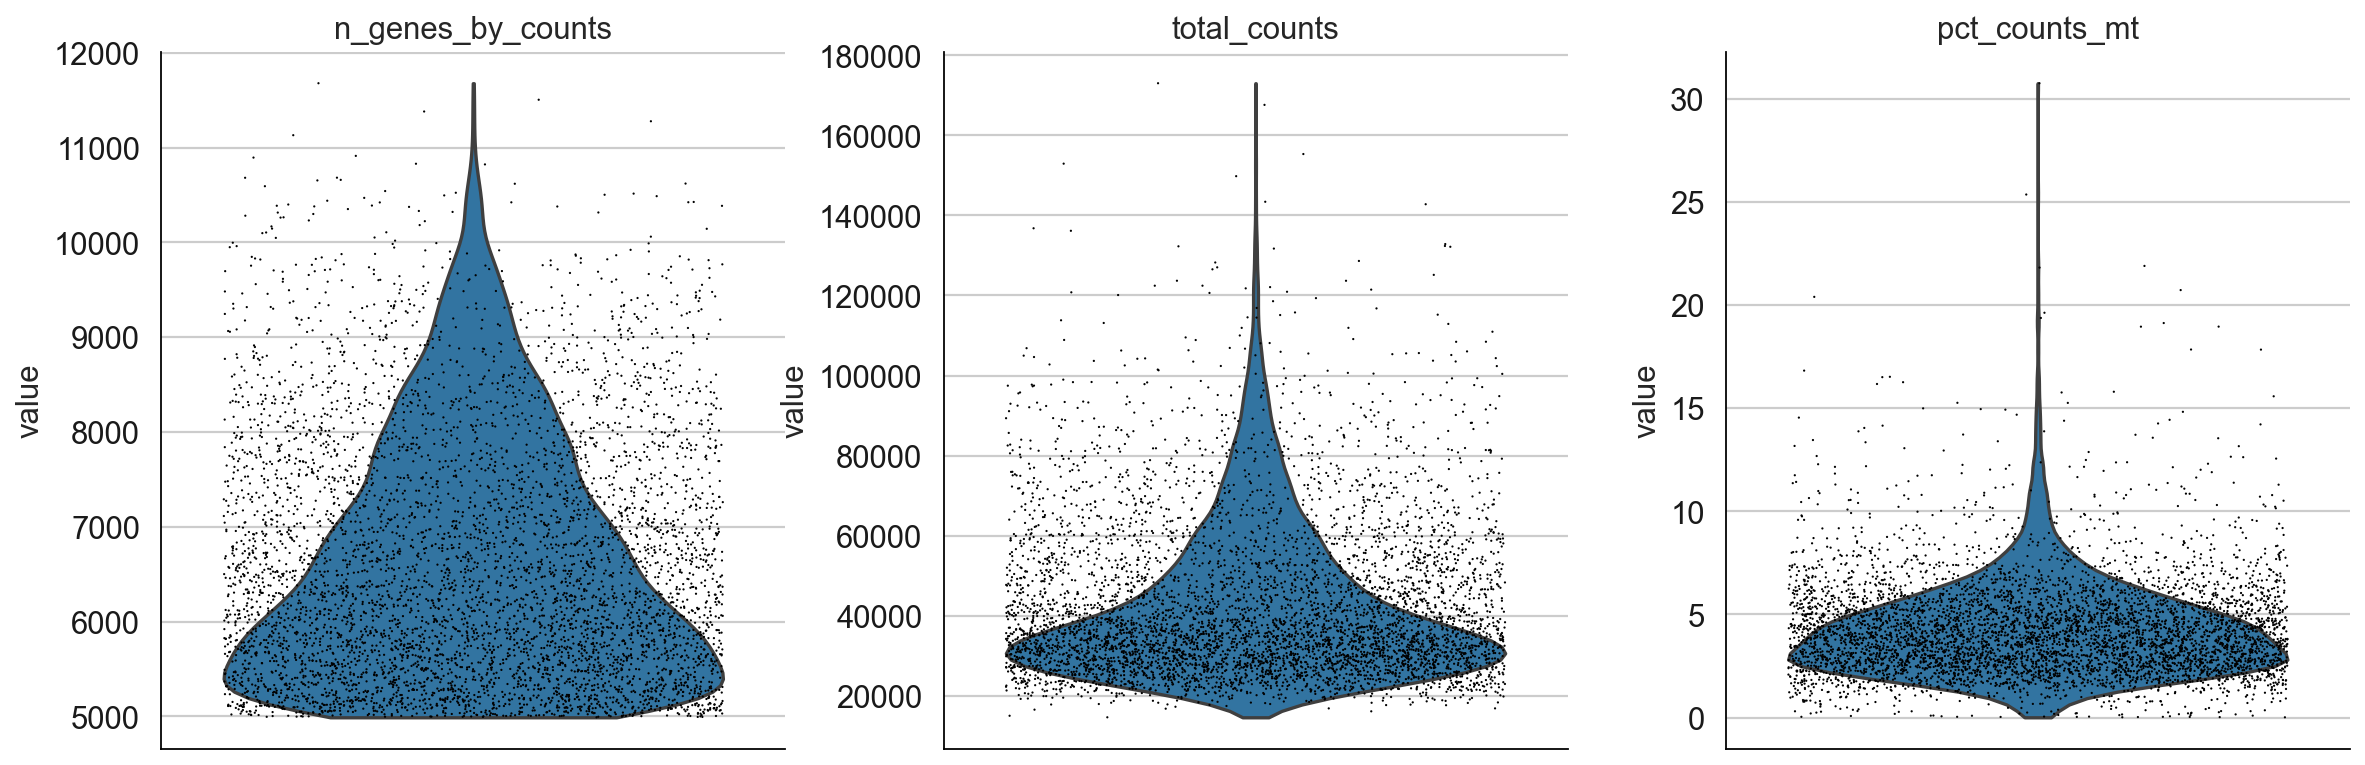

In [84]:
#filtering
sc.pp.filter_cells(adata, min_genes=5000) #fiter out cells that express less than 5000 genes
sc.pp.filter_genes(adata, min_cells=20)
#after filtering 
#show genes that yield highest fraction of counts
sc.pl.highest_expr_genes(adata, n_top=30, )

#quality matrix
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

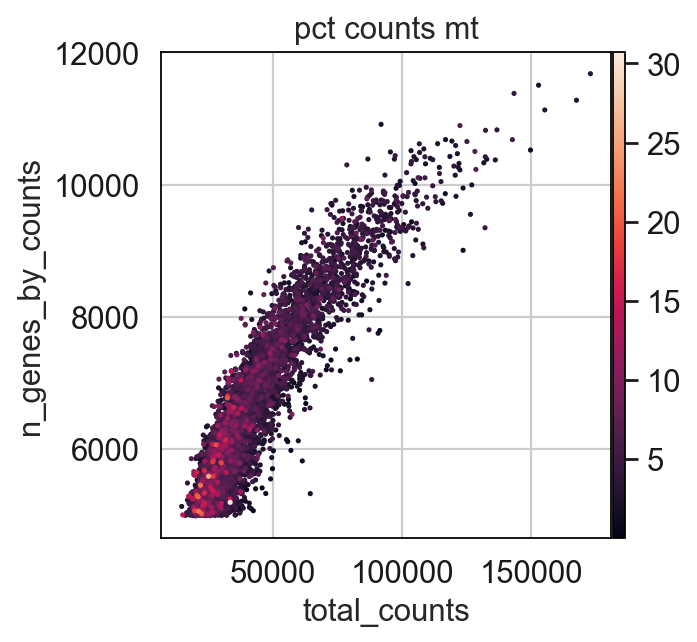

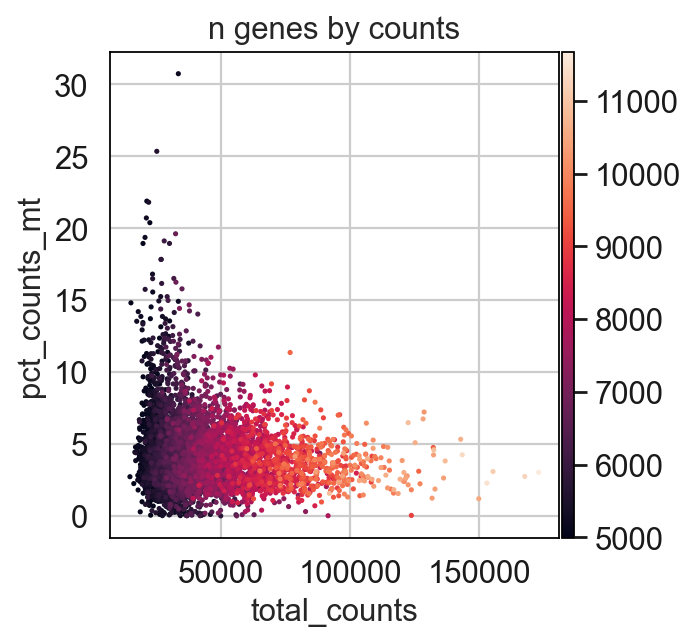

In [85]:
# plot a scatter plot of QC metrics
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color = 'n_genes_by_counts')


<AxesSubplot:xlabel='pct_counts_mt', ylabel='Count'>

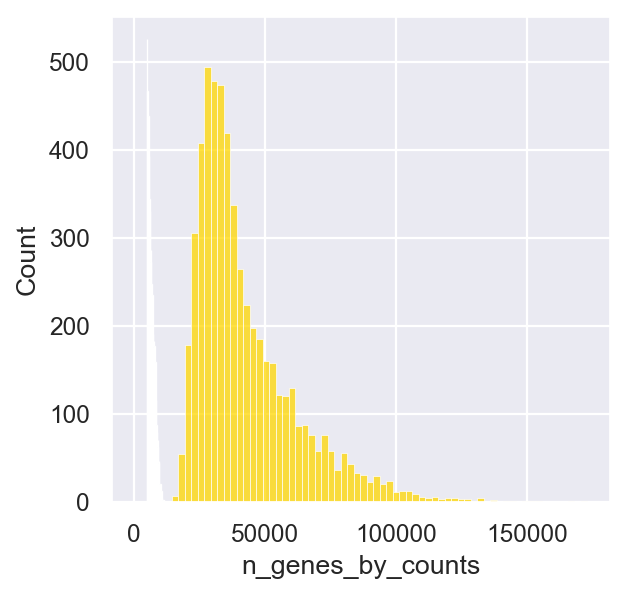

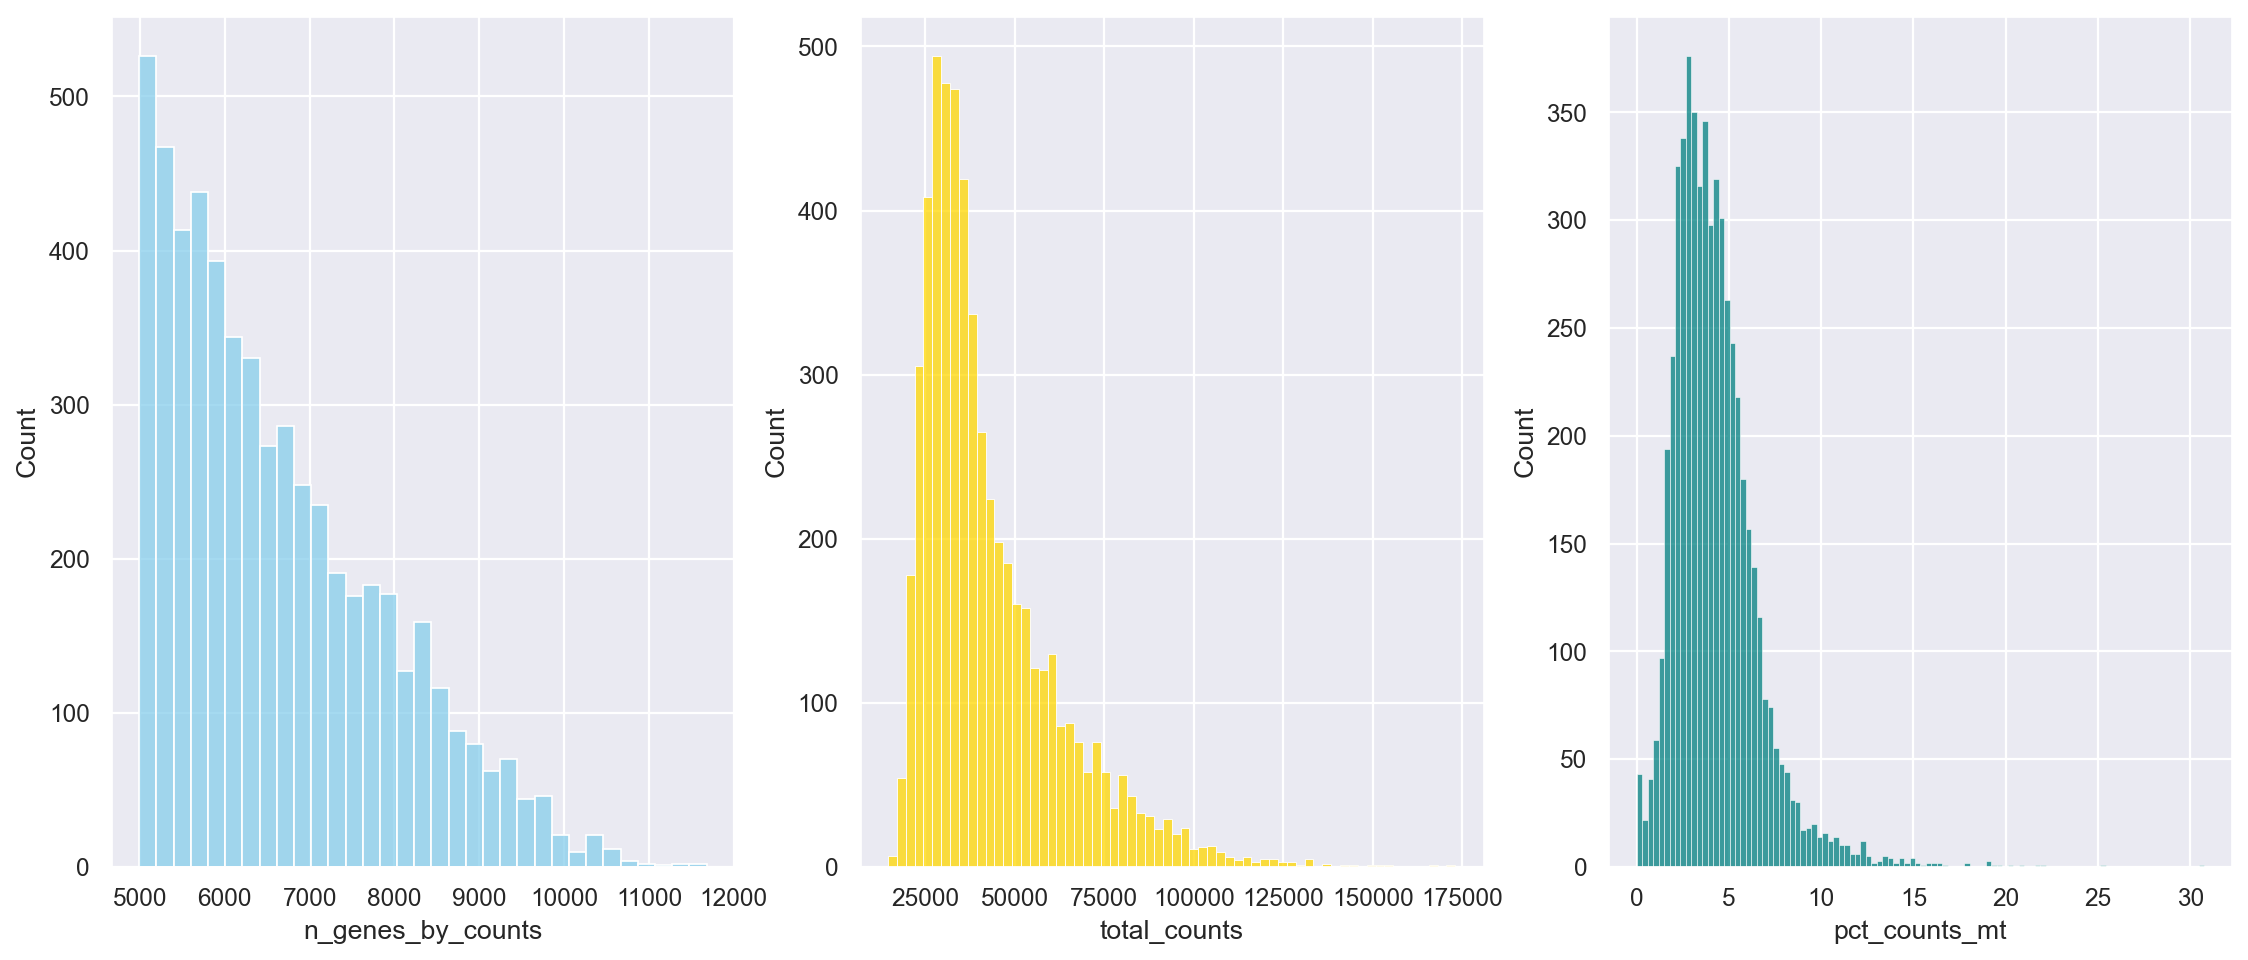

In [86]:
# plot a histograph of a single variable
sns.set(style="darkgrid")
sns.histplot(adata.obs["n_genes_by_counts"], color="skyblue")
sns.histplot(adata.obs["total_counts"],color="gold")
sns.histplot(adata.obs["pct_counts_mt"],color="teal")


fig, axs = plt.subplots(1, 3, figsize=(17, 7))
sns.histplot(adata.obs["n_genes_by_counts"], color="skyblue",ax=axs[0])
sns.histplot(adata.obs["total_counts"], color="gold",ax=axs[1])
sns.histplot(adata.obs["pct_counts_mt"], color="teal",ax=axs[2])


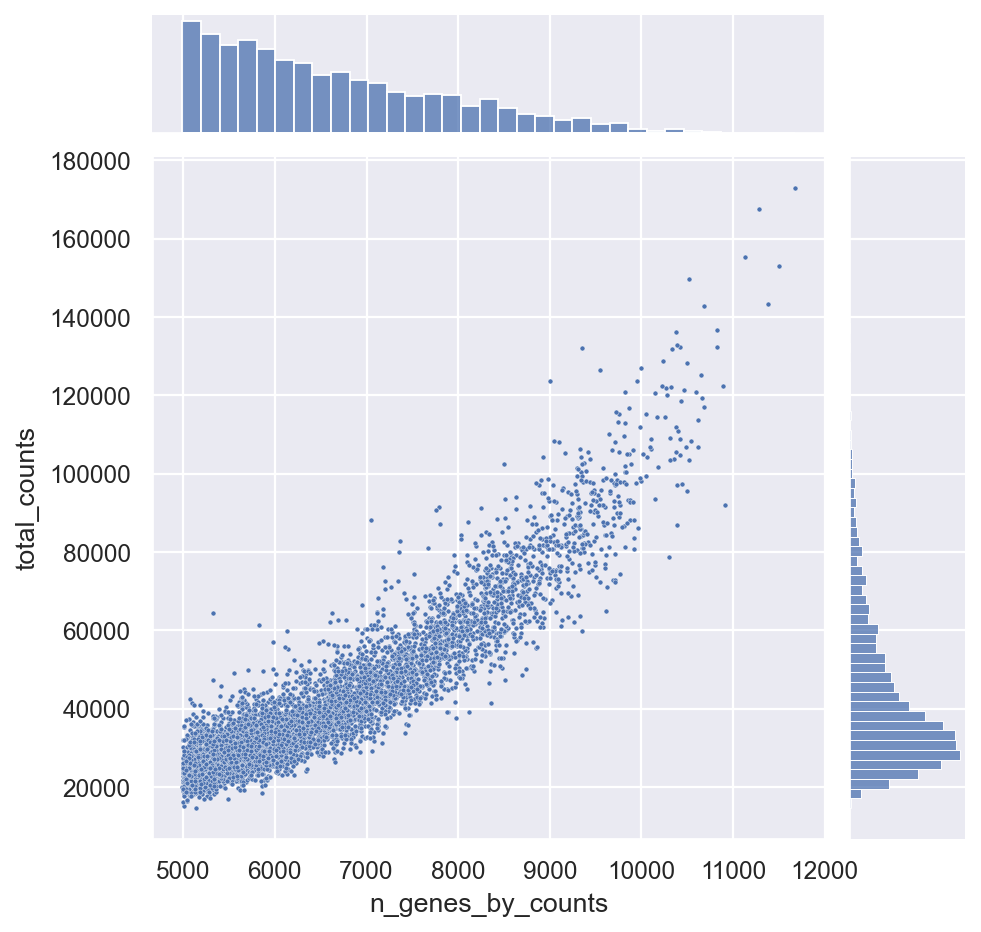

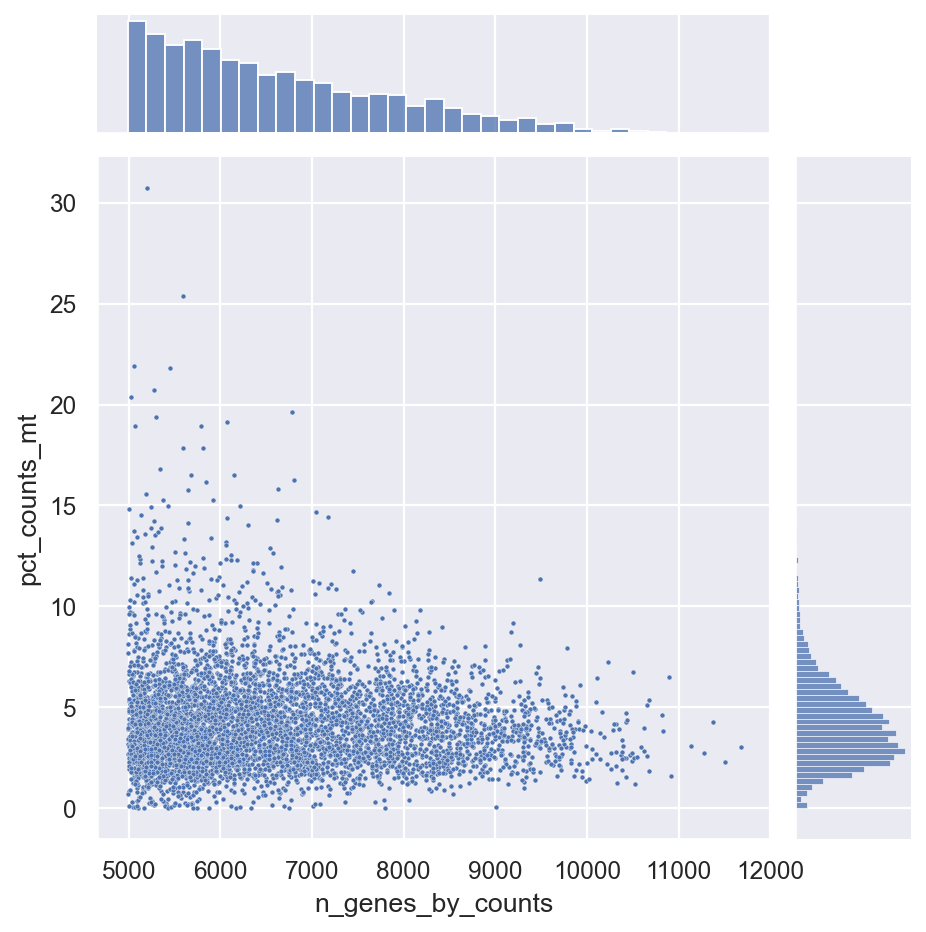

In [87]:
# Joint distribution with marginal histograms:
sns.jointplot(x="n_genes_by_counts",y="total_counts",data=adata.obs,kind="scatter",s=5)
sns.jointplot(x="n_genes_by_counts",y="pct_counts_mt",data=adata.obs,kind="scatter",s=5)